# Bosques aleatorio

Un bosque aleatorio (Random Forest) es un algoritmo de aprendizaje automático que se utiliza tanto para tareas de clasificación como de regresión. Es una técnica de ensamble que combina múltiples árboles de decisión para mejorar la precisión y la robustez del modelo. La idea principal detrás de los bosques aleatorios es reducir el riesgo de sobreajuste y aumentar la capacidad de generalización del modelo.

Cómo funciona un bosque aleatorio:

1. Bootstrap Aggregating (Bagging): Se crean múltiples subconjuntos de datos de entrenamiento mediante muestreo con reemplazo del conjunto de datos original. Cada subconjunto se utiliza para entrenar un árbol de decisión independiente.
2. Entrenamiento de árboles de decisión: Cada árbol de decisión se entrena de manera independiente utilizando un subconjunto diferente de los datos de entrenamiento.
3. Promediar o votar: Para tareas de regresión, las predicciones de todos los árboles se promedian para obtener la predicción final. Para tareas de clasificación, se utiliza la votación mayoritaria para determinar la clase final.

Ventajas de los bosques aleatorios:

* Reducción del sobreajuste: Al promediar las predicciones de múltiples árboles, se reduce el riesgo de sobreajuste.
* Robustez: Los bosques aleatorios son menos sensibles a los datos ruidosos y a los valores atípicos.
* Importancia de las características: Los bosques aleatorios pueden proporcionar una medida de la importancia de cada característica en la predicción.

# Bosque aleatorio de regresión

El bosque aleatorio de regresión no difiere mucho del de clasificación. Lo que hace es entrenar a un grupo de árboles independientes y luego promedia sus respuestas para tomar una decisión.


1. Entrenamiento de modelos de aprendizaje automático.
2. Evaluación de modelos de aprendizaje automático.
3. Ajuste de hiperparámetros.

### Parámetros de los bosque aleatorio:

* **Estimador:** En un bosque aleatorio, el estimador es un árbol de decisión. Cada árbol de decisión se entrena en un subconjunto diferente de los datos de entrenamiento, creado mediante muestreo con reemplazo (bootstrap). El número de estimadores (n_estimators) es el parámetro especifica el número de árboles de decisión que se entrenarán en el bosque aleatorio. Un mayor número de estimadores generalmente mejora la precisión del modelo, pero también aumenta el tiempo de entrenamiento y la complejidad computacional.
* **Profundidad del árbol (max_depth):** Este parámetro controla la profundidad máxima de cada árbol de decisión en el bosque. Limitar la profundidad del árbol puede ayudar a prevenir el sobreajuste.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('./datasets/train_house_price.csv')
df_train, df_valid = train_test_split(df, test_size=0.25, random_state=54321)
features_train = df_train.drop(['last_price'], axis=1)
# Dividimos por 100000 para que los valores de last_price 
# estén en el mismo rango que el resto de las variables
target_train = df_train['last_price'] / 100000 
features_valid = df_valid.drop(['last_price'], axis=1)
target_valid = df_valid['last_price'] / 100000

In [3]:
best_error = 10000 # Inicializamos con un valor alto
best_est = 0 # Inicializamos con un valor alto
best_depth = 0  # Inicializamos con un valor alto
for est in range(10, 51, 10): # Probamos con 10, 20, 30, 40 y 50 estimadores
    for depth in range (1, 11): # Probamos con profundidades de 1 a 10
        model = RandomForestRegressor(random_state=54321, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        error = mean_squared_error(target_valid, predictions_valid)**0.5
        print("Validación de RECM para los n_estimators de", est, ", depth=", depth, "es", error)
        if error < best_error:
            best_error = error
            best_est = est
            best_depth = depth

print("RECM del mejor modelo en el conjunto de validación:", best_error, "n_estimators:", best_est, "best_depth:", best_depth)

Validación de RECM para los n_estimators de 10 , depth= 1 es 2.3960212238796124
Validación de RECM para los n_estimators de 10 , depth= 2 es 2.1122446639688435
Validación de RECM para los n_estimators de 10 , depth= 3 es 1.9740959499997468
Validación de RECM para los n_estimators de 10 , depth= 4 es 1.8427098576557455
Validación de RECM para los n_estimators de 10 , depth= 5 es 1.784417875686694
Validación de RECM para los n_estimators de 10 , depth= 6 es 1.8702209720173095
Validación de RECM para los n_estimators de 10 , depth= 7 es 1.793159121509078
Validación de RECM para los n_estimators de 10 , depth= 8 es 1.7468096998889795
Validación de RECM para los n_estimators de 10 , depth= 9 es 1.7909475486091944
Validación de RECM para los n_estimators de 10 , depth= 10 es 1.730814097537693
Validación de RECM para los n_estimators de 20 , depth= 1 es 2.385864337512238
Validación de RECM para los n_estimators de 20 , depth= 2 es 2.114680438966696
Validación de RECM para los n_estimators de 

In [4]:
# Random Forest con Grid Search
model = RandomForestRegressor(random_state=54321)

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(features_train, target_train)
print("Mejores parámetros encontrados por Grid Search:", grid_search.best_params_)
print("RECM del mejor modelo en el conjunto de validación:", grid_search.best_score_*(-1)**0.5)


Mejores parámetros encontrados por Grid Search: {'max_depth': 9, 'n_estimators': 40}
RECM del mejor modelo en el conjunto de validación: (-1.5751277914359486e-16-2.5723788973810473j)


## Tiempo de ejecución

Se puede especificar el número de núcleos de CPU que se deben usar para ejecutar una tarea en paralelo. Esto es útil para acelerar el entrenamiento y la evaluación de modelos, especialmente cuando se trabaja con grandes conjuntos de datos o modelos complejos.

Valores de n_jobs:

* n_jobs=None: Utiliza un solo núcleo de CPU (este es el valor predeterminado).
* n_jobs=1: También utiliza un solo núcleo de CPU.
* n_jobs=2: Utiliza dos núcleos de CPU.
* n_jobs=-1: Utiliza todos los núcleos de CPU disponibles en la máquina.

>cores=1: 9.162 seconds
>cores=2: 5.736 seconds
>cores=3: 4.523 seconds
>cores=4: 3.953 seconds
>cores=5: 3.620 seconds
>cores=6: 2.489 seconds
>cores=7: 3.476 seconds
>cores=8: 2.233 seconds
>cores=9: 2.248 seconds
>cores=10: 2.176 seconds
>cores=11: 2.034 seconds
>cores=12: 2.048 seconds
Best number of cores: 11
Best time: 2.034


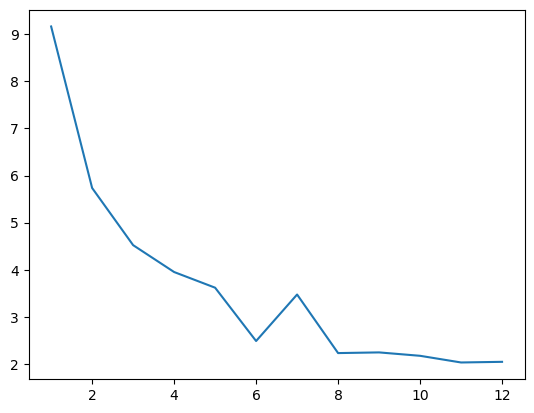

In [5]:
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
results = list()
# compare timing for number of cores
n_cores = [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12]
for n in n_cores:
 # define the model
 model = RandomForestClassifier(n_estimators=100, n_jobs=1)
 # define the evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 # record the current time
 start = time()
 # evaluate the model
 n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=n)
 # record the current time
 end = time()
 # store execution time
 result = end - start
 print('>cores=%d: %.3f seconds' % (n, result))
 results.append(result)

#best number of cores

print('Best number of cores: %d' % n_cores[np.argmin(results)])
print('Best time: %.3f' % results[np.argmin(results)])


#plot 
plt.plot(n_cores, results)
plt.show()

In [6]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
   
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')   
        
        eval_stats[type]['Exactitud'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return eval_stats['train']['F1'], eval_stats['test']['F1']


In [7]:
# Random Forest Classifier with grid search and njobs and standar scaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('./datasets/train_house_price.csv')
df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']

scaler = StandardScaler()
features = scaler.fit_transform(features)

test_df = pd.read_csv('./datasets/test_house_price.csv')

test_df.loc[test_df['last_price'] > 113000, 'price_class'] = 1
test_df.loc[test_df['last_price'] <= 113000, 'price_class'] = 0

test_features = test_df.drop(['last_price', 'price_class'], axis=1)
test_target = test_df['price_class']

test_features = scaler.fit_transform(test_features)


model = RandomForestClassifier(random_state=54321,class_weight='balanced')

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'min_samples_split': [2, 10, 20],
    #'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search.fit(features, target)


print("Mejores parámetros encontrados por Grid Search:", grid_search.best_params_)
print("Accuracy del mejor modelo en el conjunto de test:", grid_search.best_score_)

#predict

predictions = grid_search.predict(test_features)
print("Accuracy en el conjunto de test:", accuracy_score(test_target, predictions))




Mejores parámetros encontrados por Grid Search: {'max_depth': 10, 'n_estimators': 30}
Accuracy del mejor modelo en el conjunto de test: 0.8949961508852964
Accuracy en el conjunto de test: 0.6820987654320988


           train  test
Exactitud   0.96  0.68
F1          0.96  0.74
APS         0.99  0.80
ROC AUC     0.99  0.83


(0.9559237261644263, 0.735897435897436)

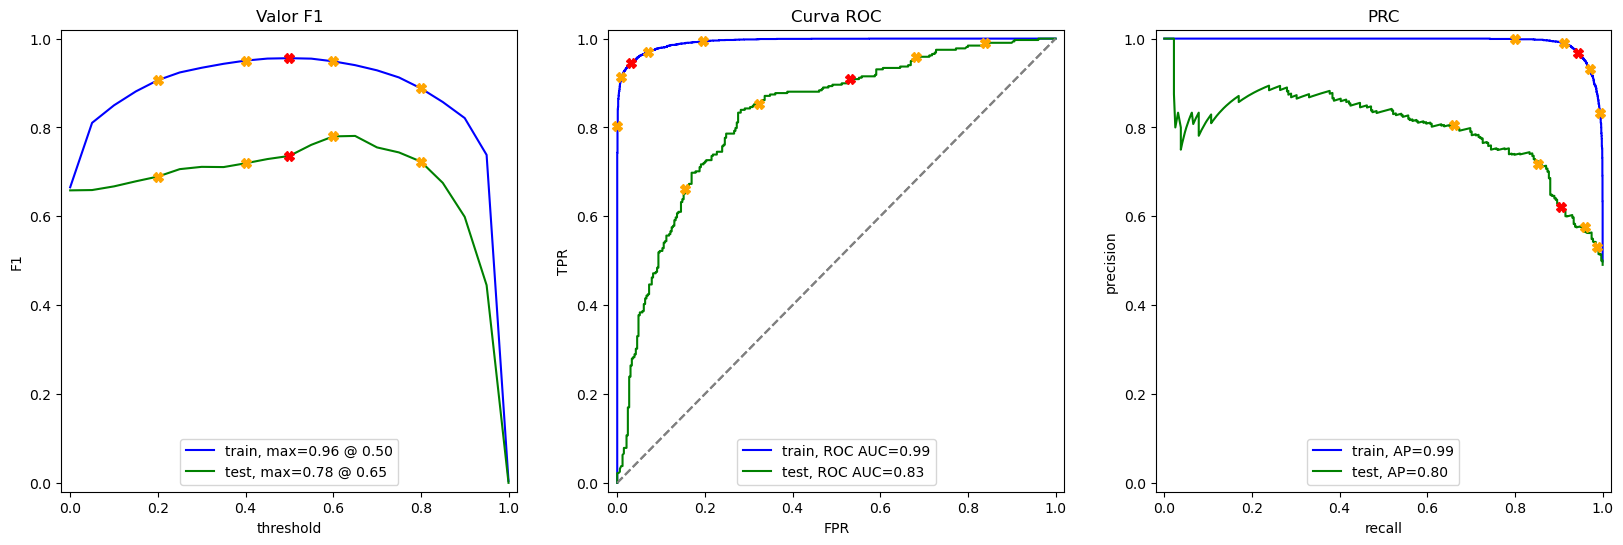

In [8]:
evaluate_model(grid_search, features, target, test_features, test_target)

In [9]:
# Solo para comparar con el modelo de árbol de decisión
 
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=12345)
model_dt.fit(features, target)
train_predictions_dt = model_dt.predict(features)
test_predictions_dt = model_dt.predict(test_features)

print('Exactitud')
print('Training set:', accuracy_score(target, train_predictions_dt))
print('Test set:', accuracy_score(test_target, test_predictions_dt))

Exactitud
Training set: 0.9998460354118552
Test set: 0.6466049382716049


           train  test
Exactitud    1.0  0.65
F1           1.0  0.69
APS          1.0  0.58
ROC AUC      1.0  0.65


(0.999845512127298, 0.6850068775790922)

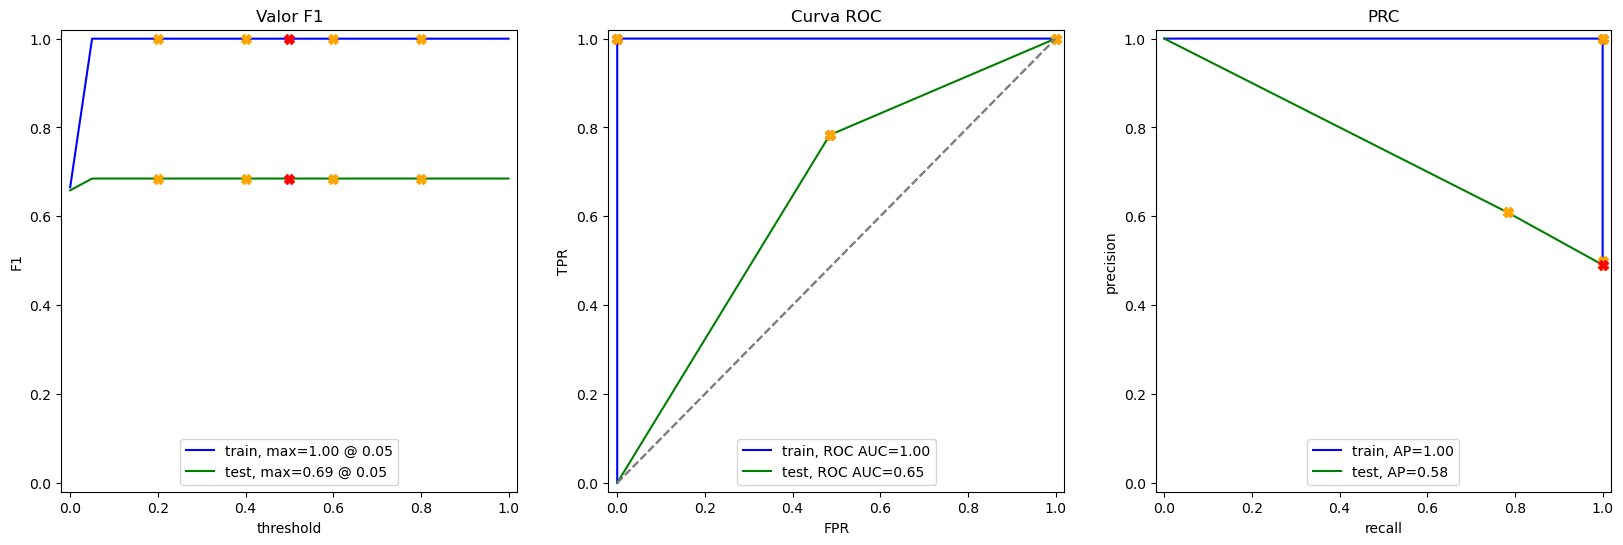

In [10]:
evaluate_model(model_dt, features, target, test_features, test_target)